In [3]:
import numpy as np

x = np.arange(0, 100, 0.1)
y = 0.5 * np.sin(2*x) - np.cos(x*0.5)

data = y.reshape(-1,1)

print(data.shape)

(1000, 1)


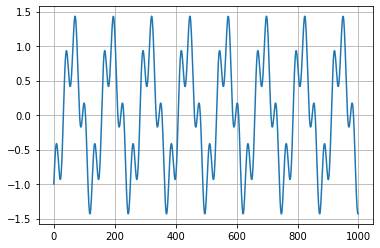

In [4]:
import matplotlib.pyplot as plt

plt.plot(data)
plt.grid()
plt.show()

In [5]:
def seq2data(seq, window, horizon):

  x_temp = []
  y_temp = []

  for i in range(len(seq) - (window + horizon) + 1):

    x_temp.append(seq[i:(i + window)])
    y_temp.append(seq[i + window + horizon - 1])

  return np.array(x_temp), np.array(y_temp)

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras import Sequential

w = 20
h = 1

x_data, y_data = seq2data(data, w, h)

print(x_data.shape, y_data.shape)

(980, 20, 1) (980, 1)


In [7]:
split_ratio = 0.8

split = int(split_ratio * len(x_data))

x_train = x_data[0:split]
y_train = y_data[0:split]

x_test = x_data[split:]
y_test = y_data[split:]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(784, 20, 1) (784, 1) (196, 20, 1) (196, 1)


In [8]:
model = Sequential()

model.add(SimpleRNN(units=128, activation='tanh',
                    input_shape=x_train[0].shape))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 128)               16640     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

training = model.fit(x_train, y_train, epochs=100,
                     validation_data=(x_test, y_test))

Epoch 1/100
25/25 [==============================] - 5s 24ms/step - loss: 0.0926 - mae: 0.1867 - val_loss: 0.0053 - val_mae: 0.0595
Epoch 2/100
25/25 [==============================] - 0s 15ms/step - loss: 0.0028 - mae: 0.0421 - val_loss: 9.5237e-04 - val_mae: 0.0238
Epoch 3/100
25/25 [==============================] - 0s 15ms/step - loss: 8.0927e-04 - mae: 0.0218 - val_loss: 8.4340e-04 - val_mae: 0.0242
Epoch 4/100
25/25 [==============================] - 0s 16ms/step - loss: 5.5643e-04 - mae: 0.0187 - val_loss: 7.3715e-04 - val_mae: 0.0227
Epoch 5/100
25/25 [==============================] - 0s 16ms/step - loss: 7.9285e-04 - mae: 0.0227 - val_loss: 5.2584e-04 - val_mae: 0.0193
Epoch 6/100
25/25 [==============================] - 0s 15ms/step - loss: 3.8822e-04 - mae: 0.0153 - val_loss: 2.9524e-04 - val_mae: 0.0133
Epoch 7/100
25/25 [==============================] - 0s 16ms/step - loss: 2.8463e-04 - mae: 0.0135 - val_loss: 3.2651e-04 - val_mae: 0.0154
Epoch 8/100
25/25 [=============

In [12]:
p = model.predict(x_test)

print(p.shape)

(196, 1)


In [13]:
rand_idx = np.random.randint(0, len(y_test), size=5)

print('random idx =', rand_idx)
print('predict =', p.flatten()[rand_idx])
print('label =', y_test.flatten()[rand_idx])

rand_idx = np.random.randint(0, len(y_test), size=5)

print('random idx =', rand_idx)
print('predict =', p.flatten()[rand_idx])
print('label =', y_test.flatten()[rand_idx])


random idx = [155  65  33 146  13]
predict = [ 0.59059525 -1.2759573   0.141615    1.4207217   1.0214119 ]
label = [ 0.5966764  -1.28569752  0.14216838  1.42900005  1.01854352]
random idx = [  5 170 160 134 177]
predict = [0.42362493 0.01499013 0.01851386 0.5858747  0.1487121 ]
label = [0.4246569  0.00531309 0.01578705 0.58476182 0.14653515]


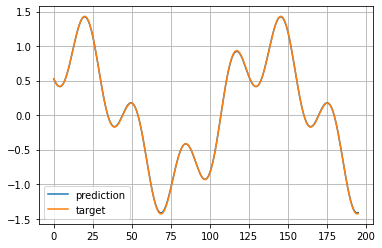

In [14]:
plt.plot(p, label='prediction')
plt.plot(y_test, label='target')
plt.legend()
plt.grid()
plt.show()